# _Parrot_

Sebastian Granda

#### References

- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py
- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_log_gamma.html#sphx-glr-auto-examples-color-exposure-plot-log-gamma-py

In [1]:
import skimage as skt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
original = skt.io.imread(fname="Assets/parrot.jpg")

## Funciones

In [6]:
def plot_img_and_hist(image, axes, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram.
    """
    image = skt.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Intensidad de pixel')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = skt.exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

## 1. Imagen en escala grises e histograma normalizado.

In [3]:
img = skt.color.rgb2gray(original)

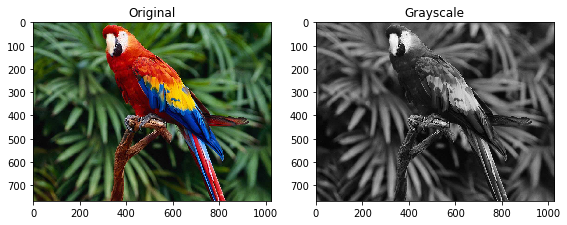

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

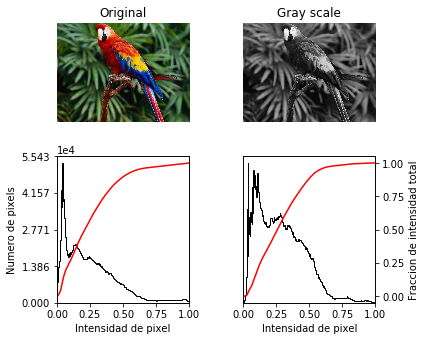

In [8]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(original, axes[:, 0])
ax_img.set_title('Original')

#=
y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Numero de pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
#=

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 1])
ax_img.set_title('Gray scale')

#=
ax_cdf.set_ylabel('Fraccion de intensidad total')
ax_cdf.set_yticks(np.linspace(0, 1, 5))
#=

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 2. Aplicar dos transformaciones de intensidad

### 2.1. Transformacion gamma y log

In [9]:
# Gamma
gamma_corrected = skt.exposure.adjust_gamma(img, 2)

In [10]:
# Logarithmic
logarithmic_corrected = skt.exposure.adjust_log(img, 1)

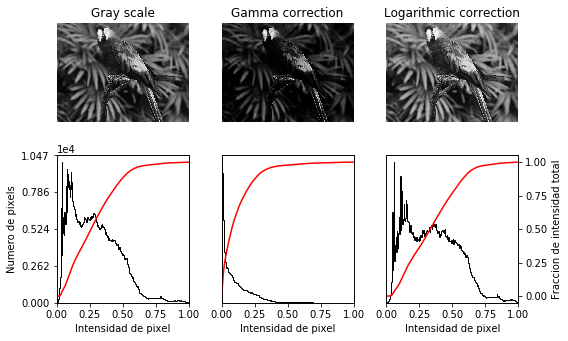

In [11]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Gray scale')

#=
y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Numero de pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
#=

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

#=
ax_cdf.set_ylabel('Fraccion de intensidad total')
ax_cdf.set_yticks(np.linspace(0, 1, 5))
#=

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### 2.2. Histogram equalization


- Enhances an image with low contrast.

In [12]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98)) 
img_rescale = skt.exposure.rescale_intensity(img, in_range=(p2, p98))

In [13]:
# Equalization
img_eq = skt.exposure.equalize_hist(img)

In [15]:
# Adaptive Equalization
img_adapteq = skt.exposure.equalize_adapthist(img, clip_limit=0.03)

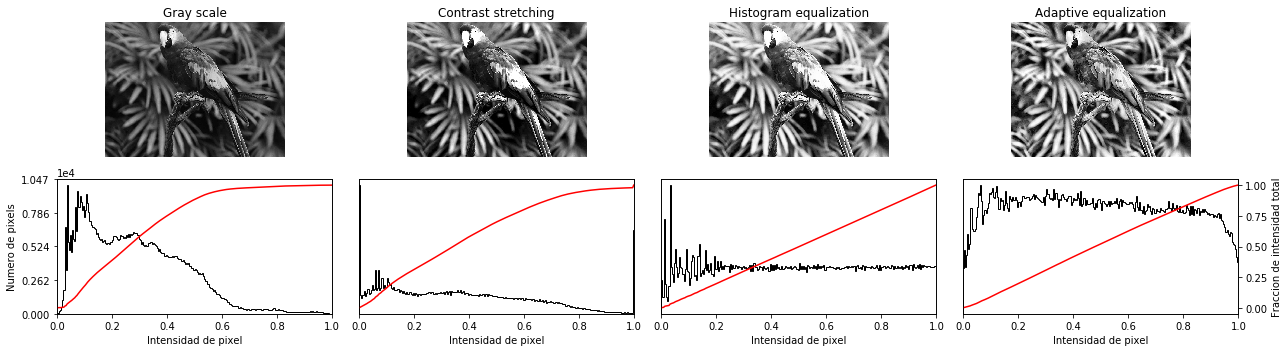

In [18]:
# Resultados
fig = plt.figure(figsize=(18, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Gray scale')

#=
y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Numero de pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
#=

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

#=
ax_cdf.set_ylabel('Fraccion de intensidad total')
ax_cdf.set_yticks(np.linspace(0, 1, 5))
#=

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 3. Transformación inversa

No es posible obtener una transformacion inversa, ya que no se trata de una proyeccion 1 a 1.